https://doc.sagemath.org/html/en/reference/rings_numerical/sage/rings/real_mpfi.html

https://doc.sagemath.org/html/en/reference/spkg/mpfi.html#spkg-mpfi

https://doc.sagemath.org/html/en/reference/spkg/mpfr.html#spkg-mpfr

In [47]:
pts = [uniform(-1, 1) for _ in range(100)]

In [2]:
def smooth_fast_callable_rif2(f, x, zero_value=RIF(0)):
    f_fast = fast_callable(f, vars=[x], domain=RIF)
    def f_modified2(interval):
        interval = RIF(interval)
        if interval.contains_zero():
            if interval.absolute_diameter() <= 2**(-prec+1):
                return RIF(zero_value)
            else :
                a, b = interval.endpoints()
                mid = interval.center()
                left = f_modified2(RIF(a, mid))
                right = f_modified2(RIF(mid, b))
                return left.union(right)
        r = f_fast(interval)
        if r.is_NaN():
            print(interval)
        return r

    return f_modified2


In [13]:
prec = 200
RBF = RealBallField(prec)
RIF = RealIntervalField(prec)

W = (-x/2 + sqrt(1/27 + x^2/4))^(1/3) - (x/2 + sqrt(1/27 + x^2/4))^(1/3)

I = RIF(3,4)
print(abs(W(x=I)))
print(RIF(W(x=I)).upper())
print(RIF(W(x=I)).lower())

print(smooth_fast_callable_rif2(exp(x),x,RIF(1))(RIF(-1,1)))

abs(-(3.?*sqrt(1/3) + 2.?)^(1/3) + (3.?*sqrt(1/3) - 2.?)^(1/3))
NaN
NaN


NameError: name 'smooth_fast_callable_rif2' is not defined

In [ ]:
prec = 200
RBF = RealBallField(prec)
f = (exp(x)-1)/x
f0 = limit(f, x=0) 
g(x) = piecewise([ (0, f0), ('else', f) ])
g_rb = fast_callable(g, R)
B = RBF.ball(0, 1e-4)
g_rb(B)

ValueError: 0 does not determine real interval

In [10]:
x = var('x')
f = piecewise([
    [(-oo, 0), -1],        # x < 0
    [(0, 0), 0],           # x == 0
    [(0, oo), 1]           # x > 0
], var=x)


In [11]:
f(-1)   # -1
f(0)    # 0
f(1)    # 1

plot(f, (x, -3, 3))


ValueError: point 0 is not in the domain

In [4]:
from sage.rings import real_mpfi
RIF = RealIntervalField(prec)
real_mpfi.printing_style = 'brackets'
x = var('x')
f = fast_callable(x+1,vars=[x],domain=RIF)
I = RIF(-10, 2)
# print(f(I))
# print(f(f(I)))

#print(smooth_fast_callable_rif(phi_0,x,phi_0_0)(RIF(0,0)))


I1=RIF(-2**(-prec-999999),2**(-prec-999999))
I2=RIF(-2**(-prec-9999999),2**(-prec-9999999))
print(I1)
print(I2)
print(I2 in I1)
print(I1 in I2)

[-1.2570914763098893821294359732208888884060382342032850944501169e-301090 .. 1.2570914763098893821294359732208888884060382342032850944501169e-301090]
[-1.3752797580758236428281328214757553809823827575592297065276754e-3010360 .. 1.3752797580758236428281328214757553809823827575592297065276754e-3010360]
True
False


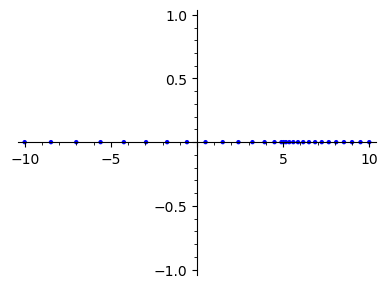

In [74]:
def points_concentres(A, B, y, n):

    t = [-1+ 2*i/(n-1) for i in range(n)]

    # On applique une fonction en cloche (gaussienne aplatie) pour concentrer autour de 0
    t_concentres = [xi * abs(xi)**0.5 for xi in t]

    # Transformation vers l'intervalle [A, B] concentrée autour de y
    largeur_gauche = y - A
    largeur_droite = B - y

    points = []
    for xi in t_concentres:
        if xi < 0:
            val = y + xi * largeur_gauche
        else:
            val = y + xi * largeur_droite
        points.append(val)

    return points

A = -10
B = 10
y = 5
n = 30

pts = points_concentres(A, B, y, n)
list_plot([[x, 0] for x in pts], plotjoined=False, marker='o', figsize=4)



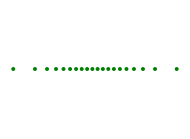

In [62]:
def grid_concentrated_1D(y,A, n, B=NaN):
    if B == NaN:
        B = A
        A = -B
    if not (A <= y <= B):
        raise ValueError("y doit être entre A et B.")
    if n == 1:
        return [y]

    from scipy.stats import norm
    # Espace normalisé symétrique autour de 0
    t = [(i + 0.5) / n for i in range(n)]
    # Transformée inverse de la fonction de répartition normale
    z = [norm.ppf(val) for val in t]

    # Normalisation dans [A,B] centrée autour de y
    z_min = min(z)
    z_max = max(z)
    scale = min(y - A, B - y) / max(abs(z_min), abs(z_max))
    return [y + scale * zi for zi in z]

pts = grid_concentrated_1D(1,0, 20, 10)
show(sum(point((x, 0), size=8, color="green") for x in pts), axes=False,figsize=2)


In [77]:
print(exp(RBF(pi)))
print(RBF(exp(pi)))

[23.1406926327792690057290863679485473802661062426002119934450464095243423506904527835169720 +/- 6.34e-89]
[23.1406926327792690057290863679485473802661062426002119934450464095243423506904527835169720 +/- 6.34e-89]
